In [1]:
# install.packages('pROC')

package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Rishabh\AppData\Local\Temp\RtmpQzTfqZ\downloaded_packages


In [2]:
library(pROC)
library(randomForest)

Warning message:
"package 'pROC' was built under R version 3.6.1"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [4]:
set.seed(420)

In [5]:
num.samples<-100

In [6]:
# Average man weighs 172 pounds with a standard deviation of 29
weight<-sort(rnorm(n=num.samples, mean=172, sd=29))

In [9]:
weight

[1]  86.48505  88.04764 111.50064 112.69730 121.53974 122.34533 126.53330
  [8] 129.34565 129.46268 130.17398 133.13921 133.94606 135.80871 135.97649
 [15] 137.52824 137.53069 137.84889 137.94284 138.34230 138.73312 140.70378
 [22] 141.30322 143.97564 144.83548 146.46901 146.80891 149.75276 150.36087
 [29] 150.55775 152.86059 153.60209 153.95612 155.76868 155.99589 157.07091
 [36] 157.38358 158.64549 159.74947 161.95414 162.95073 163.67417 163.89535
 [43] 163.92694 165.31023 165.65078 167.33128 167.94502 168.58421 169.39194
 [50] 171.07681 173.59978 173.65716 174.27318 175.45615 176.28313 176.80848
 [57] 176.84131 177.29813 178.25376 178.26469 178.38018 179.24342 179.76361
 [64] 179.78575 180.45380 181.66628 182.68510 183.54139 185.34010 185.79355
 [71] 186.09719 186.61832 187.03457 187.54681 187.86627 189.11469 189.28998
 [78] 189.53716 189.63001 189.83044 189.96676 190.28615 193.36506 194.11512
 [85] 194.44797 194.79597 194.95715 195.21381 197.12442 199.21711 200.19440
 [92] 202.67071 203.66495 204.95482 206.78781 210.72448 212.06899 218.33295
 [99] 227.10140 227.68239

In [7]:
obese<-ifelse(test=(runif(n=num.samples)<(rank(weight)/100)),yes = 1, no = 0)

In [8]:
obese

[1] 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0
 [38] 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1
 [75] 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

As we can observe, the **lighter samples** are **mostly 0's (Not Obese)** and the **heavier samples** are **mostly 1's (obese)**.

In [15]:
rank(weight)/100

[1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15
 [16] 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.30
 [31] 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44 0.45
 [46] 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.60
 [61] 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74 0.75
 [76] 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.90
 [91] 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00

In [26]:
set.seed(100)
runif(100)

[1] 0.30776611 0.25767250 0.55232243 0.05638315 0.46854928 0.48377074
  [7] 0.81240262 0.37032054 0.54655860 0.17026205 0.62499648 0.88216552
 [13] 0.28035384 0.39848790 0.76255108 0.66902171 0.20461216 0.35752485
 [19] 0.35947511 0.69029053 0.53581115 0.71080385 0.53834870 0.74897223
 [25] 0.42010145 0.17142021 0.77030161 0.88195359 0.54909671 0.27772376
 [31] 0.48830599 0.92850507 0.34869198 0.95415771 0.69527414 0.88945354
 [37] 0.18040725 0.62939085 0.98956414 0.13028887 0.33066053 0.86512055
 [43] 0.77758444 0.82730345 0.60332436 0.49123182 0.78035851 0.88422703
 [49] 0.20771390 0.30708590 0.33052985 0.19867907 0.23569430 0.27488666
 [55] 0.59132105 0.25339065 0.12348723 0.22990589 0.59757529 0.21140856
 [61] 0.46370118 0.64710119 0.96057309 0.67639817 0.44514802 0.35777378
 [67] 0.45573146 0.44541398 0.24509259 0.69435071 0.41223704 0.32772587
 [73] 0.57256477 0.96699908 0.66177902 0.62469772 0.85665304 0.77477889
 [79] 0.83402710 0.09151028 0.45952549 0.59939816 0.91972191 0.98282408
 [85] 0.03780258 0.57793740 0.73331417 0.24874240 0.30073652 0.73346670
 [91] 0.90695438 0.20981677 0.35813799 0.44829914 0.90642643 0.38943930
 [97] 0.51745975 0.12523909 0.03014575 0.77180549

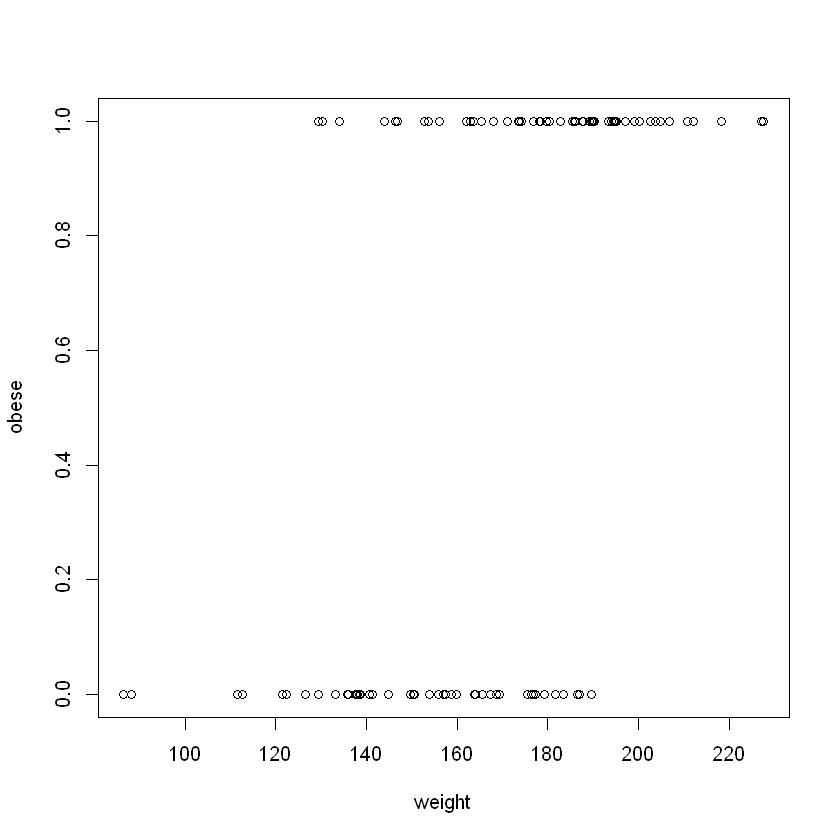

In [27]:
plot(x = weight, y = obese)

Now, we will use the **glm()** function to fit a **logistic regression** curve to the data.

In [28]:
glm.fit<-glm(obese~weight, family = binomial)

In [31]:
summary(glm.fit)


Call:
glm(formula = obese ~ weight, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8342  -0.7994   0.3874   0.7736   2.0260  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.21184    1.98332  -4.645 3.41e-06 ***
weight       0.05636    0.01177   4.787 1.69e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 137.63  on 99  degrees of freedom
Residual deviance: 101.32  on 98  degrees of freedom
AIC: 105.32

Number of Fisher Scoring iterations: 4


In [33]:
head(glm.fit$fitted.values)

1          2          3          4          5          6 
0.01290442 0.01407579 0.05082437 0.05417853 0.08616596 0.08980914

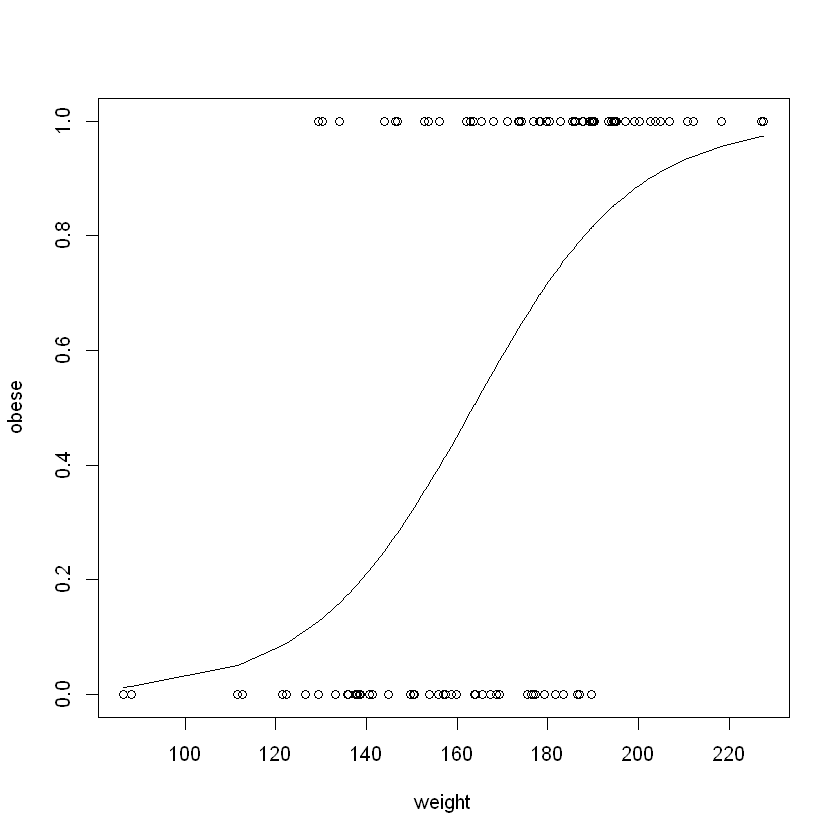

In [30]:
plot(x = weight, y = obese)
lines(weight, glm.fit$fitted.values)

The above curve tells us the **predicted probability** that individual is **obese** or **not obese**. 

**glm.fit\\$fitted.values** contains y-axis coordinates along the curve for each sample. In other words, **glm.fit\\$fitted.values** contains estimated **probabilities** that each sample is obese.


We will now use the **known classifications** and the **estimated probabilities** to draw an **ROC curve**.

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     plot = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 0.8291

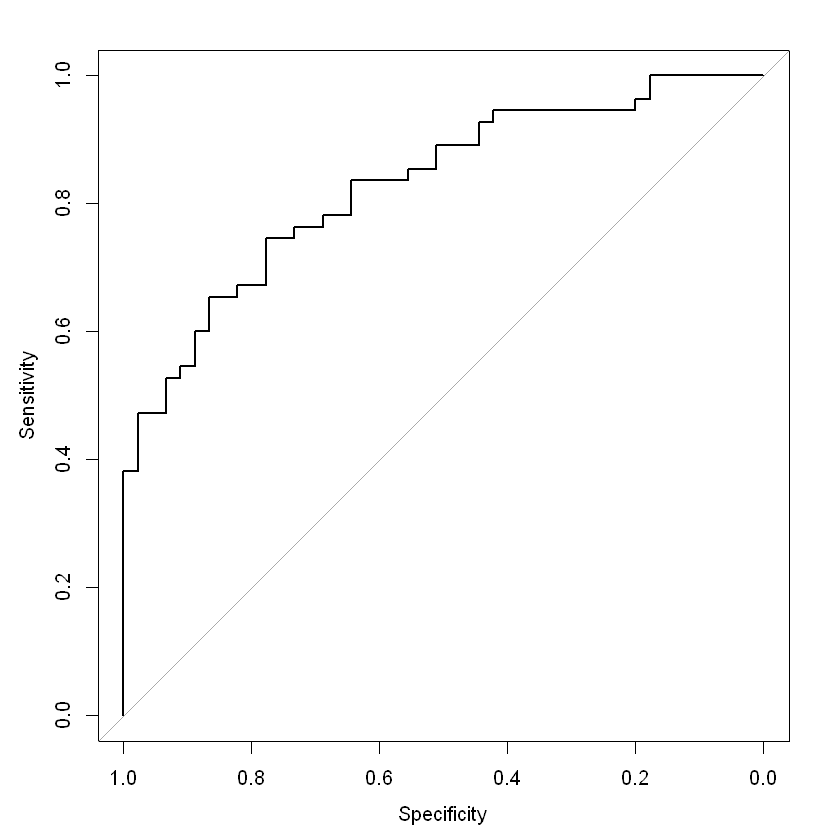

In [40]:
# par(pty='s')  Used in Rstudio to remove the extra paddings on the side (plot type s = square)
roc(obese, glm.fit$fitted.values, plot= TRUE)

By default, the ROC function plots Specificity on the X-axis instead of 1-Specificity. As a result, X-axis goes from 1 on the left side to 0 on the right side.

The below code shows the 1-Specificity on the X-axis.

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     plot = TRUE, legacy.axes = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 0.8291

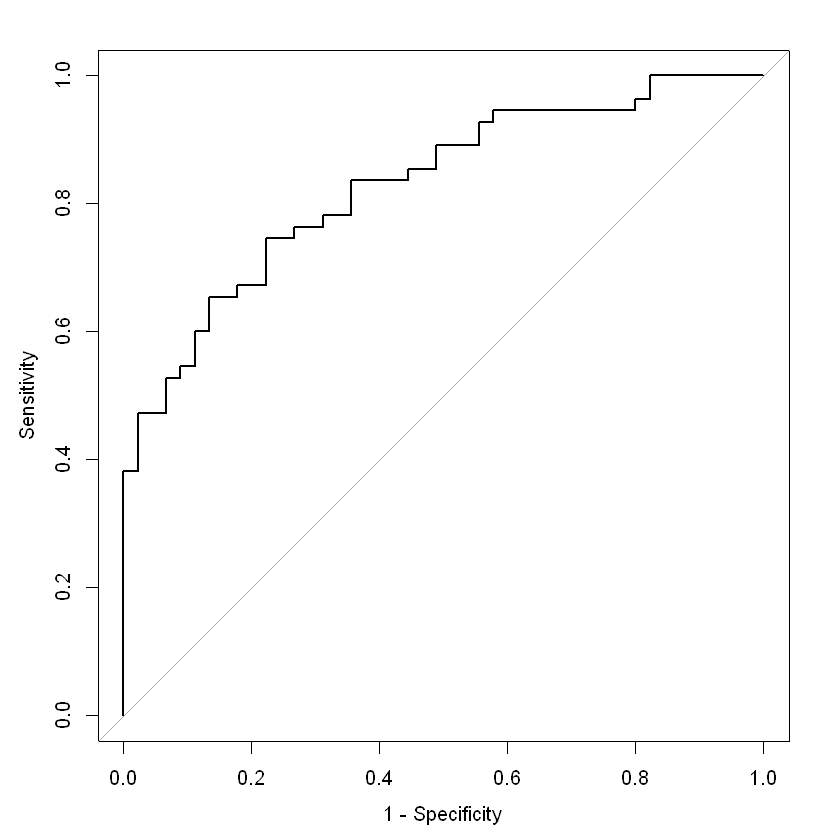

In [41]:
roc(obese, glm.fit$fitted.values, plot= TRUE, legacy.axes = TRUE)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Positive Percentage", col = "#756bb1", lwd = 3)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 82.91%

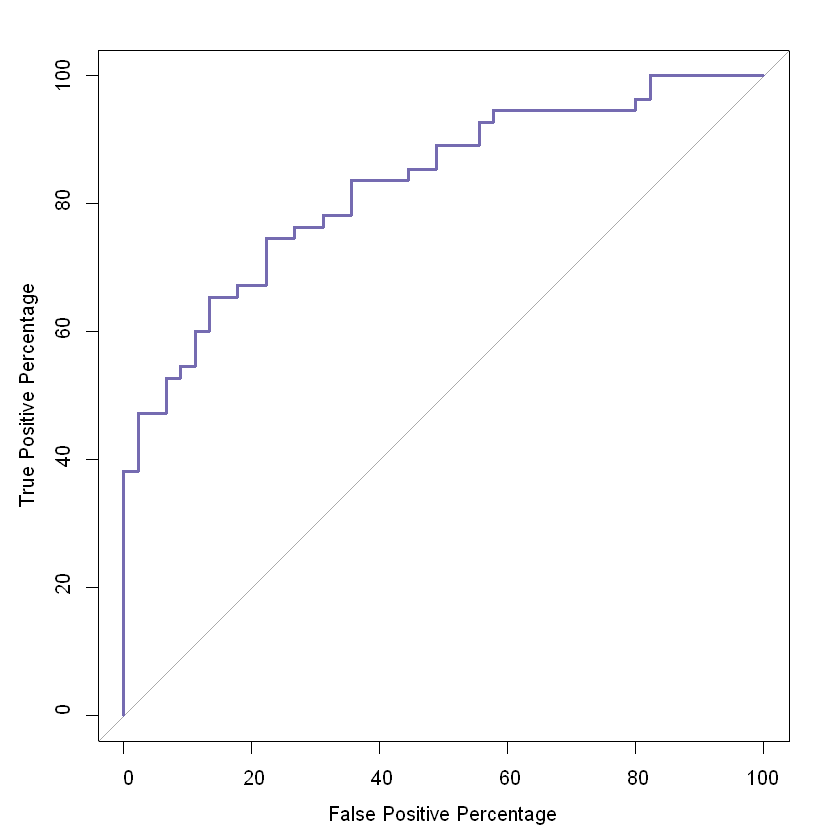

In [53]:
# Look at colorbrewer website for colors
roc(obese, glm.fit$fitted.values, plot= TRUE, legacy.axes = TRUE, percent = TRUE, xlab = 'False Positive Percentage',
    ylab = 'True Positive Percentage', col = '#756bb1', lwd = 3)

Suppose we are now interested in the **range of thresholds** that resulted in some part of the above **ROC curve**.

We can access those **thresholds** by saving the calculations that **roc() function** did in a variable and then create a dataframe that contains all of the **True Positive Percentages** by multiplying the **Sensitivities** by **100** and **False Positive Percentages** by multiplying **1 - Specificities** by **100** and also get the **threshold information**.

In [55]:
roc.info<-roc(obese, glm.fit$fitted.values, legacy.axes = TRUE)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


In [56]:
roc.df<- data.frame(tpp = roc.info$sensitivities*100, fpp = (1 - roc.info$specificities)*100, thresholds = 
                    roc.info$thresholds)

In [57]:
head(roc.df)

tpp,fpp,thresholds
100,100.00000,-Inf
100,97.77778,0.01349011
100,95.55556,0.03245008
100,93.33333,0.05250145
100,91.11111,0.07017225
100,88.88889,0.08798755


First row of the above dataframe corresponds to the upper right corner of the ROC curve.

In [58]:
tail(roc.df)

,tpp,fpp,thresholds
96,9.090909,0,0.9275222
97,7.272727,0,0.9371857
98,5.454545,0,0.9480358
99,3.636364,0,0.9648800
100,1.818182,0,0.9735257
101,0.000000,0,Inf


Last row of the above dataframe corresponds to the bottom left-hand corner of the ROC curve.

Now, we can islolate the **TPP**, **FPP** and **thresholds** when the True positive rate is between 60 and 80.

In [60]:
roc.df[roc.df$tpp>60 & roc.df$tpp<80,]

,tpp,fpp,thresholds
42,78.18182,35.55556,0.5049310
43,78.18182,33.33333,0.5067116
44,78.18182,31.11111,0.5166680
45,76.36364,31.11111,0.5287933
46,76.36364,28.88889,0.5429351
47,76.36364,26.66667,0.5589494
48,74.54545,26.66667,0.5676342
49,74.54545,24.44444,0.5776086
50,74.54545,22.22222,0.5946054
51,72.72727,22.22222,0.6227449


If we are interested in picking up thresholds in this range, we can do so by picking the one that has an optimal balance of **True Positives** and **False Positives**.

Now, let's show **AUC** on the ROC graph.

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Positive Percentage", col = "#756bb1", lwd = 3,     print.auc = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 82.91%

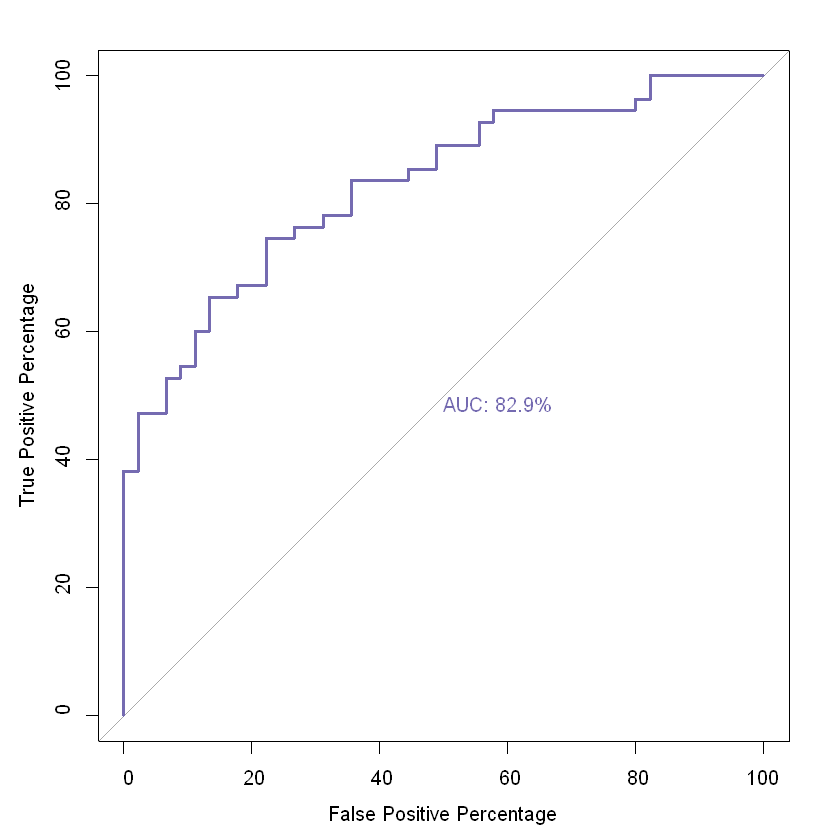

In [61]:
# print.auc= TRUE
roc(obese, glm.fit$fitted.values, plot= TRUE, legacy.axes = TRUE, percent = TRUE, xlab = 'False Positive Percentage',
    ylab = 'True Positive Percentage', col = '#756bb1', lwd = 3, print.auc= TRUE)

We can also draw and calculate a **partial Area** under the curve. These are useful when you want to focus on the part of the **ROC** curve that only allows for a small number of **False Positives**.

After specifying print.auc = TRUE, we have to specify where along the x-axis we want the AUC to be printed otherwise the text might overlap something important.

Then we set the partial.auc to a range of **specificity values** that we want to focus on. Here, partial.auc = c(100,90).
**Note:** 100% specificity corresponds to 0% on our (1-specificity) axis.

Then we draw the partial area under the curve by setting auc.polygon = TRUE. Optionally set auc.polygon.col to specify polygon's color. **Note:** Add two digits(22) to the end of RGB numbers to make the color semi-transparent.

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Positive Percentage", col = "#756bb1", lwd = 3,     print.auc = TRUE, print.auc.x = 45, partial.auc = c(100,         90), auc.polygon = TRUE, auc.polygon.col = "#fee6ce66")

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Partial area under the curve (specificity 100%-90%): 4.727%

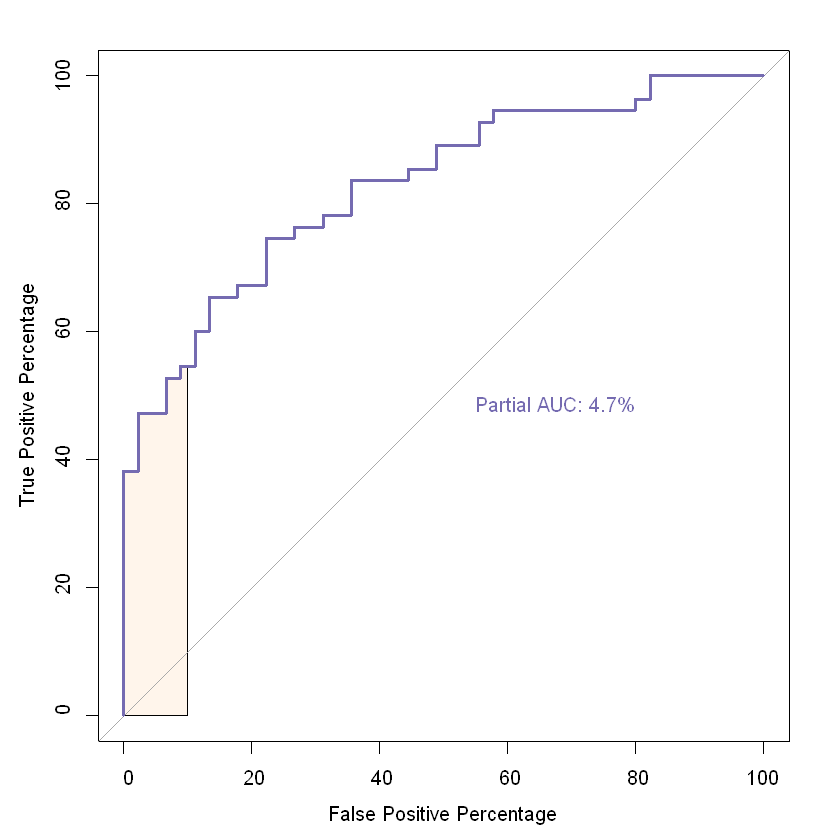

In [67]:
roc(obese, glm.fit$fitted.values, plot= TRUE, legacy.axes = TRUE, percent = TRUE, xlab = 'False Positive Percentage',
    ylab = 'True Positive Percentage', col = '#756bb1', lwd = 3, print.auc= TRUE, print.auc.x = 45, partial.auc = c(100,90),
   auc.polygon = TRUE, auc.polygon.col = '#fee6ce66')

Now, let us try to **overlap two ROC curves** so they are **easy to compare**.

In [68]:
# Random Forest Classifier
rf.model<-randomForest(factor(obese)~weight)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = obese, predictor = glm.fit$fitted.values,     percent = TRUE, plot = TRUE, legacy.axes = TRUE, xlab = "False Positive Percentage",     ylab = "True Positive Percentage", col = "#756bb1", lwd = 3,     print.auc = TRUE)

Data: glm.fit$fitted.values in 45 controls (obese 0) < 55 cases (obese 1).
Area under the curve: 82.91%

Setting levels: control = 0, case = 1
Setting direction: controls > cases


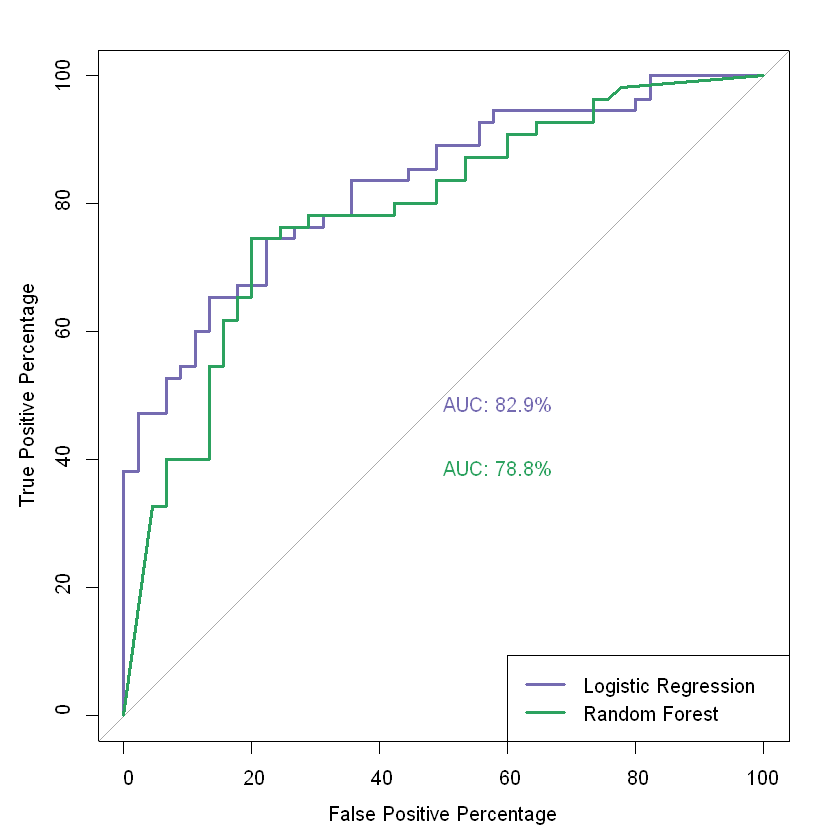

In [74]:
roc(obese, glm.fit$fitted.values, plot= TRUE, legacy.axes = TRUE, percent = TRUE, xlab = 'False Positive Percentage',
    ylab = 'True Positive Percentage', col = '#756bb1', lwd = 3, print.auc= TRUE)
plot.roc(obese, rf.model$votes[,1], percent = TRUE, col = '#2ca25f', lwd = 3, print.auc = TRUE, add = TRUE, print.auc.y=40)
legend('bottomright',legend = c('Logistic Regression', 'Random Forest'), col = c('#756bb1', '#2ca25f'), lwd = 3)

We pass in the number of trees in the forest that voted correctly. (rf.model$votes[,1])

In [79]:
head(rf.model$votes[,])

0,1
1.0000000,0.00000000
1.0000000,0.00000000
0.9887006,0.01129944
0.9896907,0.01030928
0.9768786,0.02312139
0.9771429,0.02285714


In [80]:
tail(rf.model$votes[,])

,0,1
95,0,1
96,0,1
97,0,1
98,0,1
99,0,1
100,0,1
